In [7]:
import torch
from torch import nn
import torchvision.transforms as transforms
from PIL import Image

In [4]:
lenna = Image.open("../../Pictures/Lenna.png").convert("L")

transform = transforms.Compose([
    # transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

lenna_tensor = transform(lenna)
lenna_tensor

tensor([[[ 0.2706,  0.2706,  0.2706,  ...,  0.3333,  0.2157,  0.0039],
         [ 0.2706,  0.2706,  0.2706,  ...,  0.3333,  0.2157,  0.0039],
         [ 0.2706,  0.2706,  0.2706,  ...,  0.3333,  0.2157,  0.0039],
         ...,
         [-0.6627, -0.6627, -0.6078,  ..., -0.1843, -0.2157, -0.2314],
         [-0.6549, -0.6549, -0.5686,  ..., -0.1843, -0.1765, -0.1529],
         [-0.6549, -0.6549, -0.5686,  ..., -0.1843, -0.1765, -0.1529]]])

In [5]:
def add_noise(img, mean=0, std=0.1):
    noise = torch.randn_like(img) * std + mean
    return img + noise

In [6]:
lenna_noise = add_noise(lenna_tensor)

In [9]:
def get_sobel_filter():
    sobel_tensor = torch.Tensor([[[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]],[[[1, 0, -1], [2, 0, -2], [1, 0, -1]]]])
    
    conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
    conv.weight.data = sobel_tensor
    
    return conv

In [13]:
class ConvNoise(nn.Module):
    def __init__(self):
        super(ConvNoise, self).__init__()
        
        self.conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, stride=1)
        self.blur = transforms.GaussianBlur(kernel_size=3)
        self.sobel = get_sobel_filter()
        
        
    def forward(self, x):
        x = self.conv(x)
        x = self.blur(x)
        x = self.sobel(x)
        return x
        

In [14]:
blur_net = ConvNoise()

In [16]:
lenna_blur = blur_net(lenna_tensor)
lenna_noise_blur = blur_net(lenna_noise)

In [17]:
import matplotlib.pyplot as plt

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

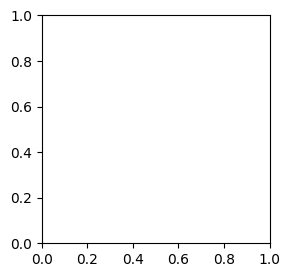

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(132)
plt.imshow(lenna_blur.detach().numpy().permute(1, 2, 0))
plt.title('Com ruído')
plt.subplot(133)
plt.imshow(lenna_noise_blur.detach().numpy().permute(1, 2, 0))
plt.title('Filtrada')
plt.show()